# Under the hood - A simple machine learning

## 1: Overview
Let us understand a very basic machine learning concept in detail using **Kaggle's** competition dataset on [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand). If we understand a basic machine learning working unit, we can dive into more complex part of machine learning without difficulty!

> **Python 3.6** is used.<br/>
> **Pre-requsite**: Basic understanding of Python modules such as **numpy, pandas and matplotlib** are  necessary.

## 1: Definitions and terminologies
Before dive in, let us go through some basic terminologies. 

**Attribute** is a **characteristic** of an object (living or non-living object). For example **male** or **female**. One more example is **blue** or **green**.

**Variable** is any entity that can take on different values. For instance, **gender** can take different values **male** or **female** for different people. Another example is **color**. 

**Domain** is a set of all possible values that a variable is allowed to have. Values of each variable **vary** across the variable's **domain**.

A variable may be **Continuous or discrete**. A continuous variable is one which can take on **infinitely** many, uncountable values. For example, the variable **time** is treated as continuous. In contrast, a discrete variable take on a **finite** number of values. For example gender or students’ grade level.

**Independent and dependent variable**
Another important distinction having to do with the term 'variable' is the distinction between an **independent and dependent variable**. 

An **independent** variable is the variable that is **changed or controlled** in a scientific experiment to test the effects on the dependent variable. **Independent variable** is also called as **feature** variable. The **dependent** variable is 'dependent' on the independent variable. Dependent variable is the variable being tested and measured in a scientific experiment. For example, the independent variables are the administration of the drug - the dosage and the timing. The dependent variable is the impact the drug has on the disease. The **dependent** variable is also called as **target** variable.

The independent and dependent variables may be viewed in terms of cause and effect. If the independent variable is changed, then an effect is seen in the dependent variable. Remember, the values of both variables may change in an experiment and are recorded. The difference is that the value of the independent variable is controlled by the experimenter, while the value of the dependent variable only changes in response to the independent variable.

## Defining a simple function
Let us consider a independent variable value $ y $ depends on the dependent variable $ x $. That is, for different values of x, there is a function, called f(x), which determines the value of y.

$ y = f(x) $ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (1) ... Function of $ x $

$ x $ = Dependent variable / Input variable / Feature variable<br/>
$ y $ = Independent variable / Output variable / Target variable<br/>
$ f(.) $ = Target function which maps Feature variable $ x $ to target variable $ y $

For the sake of simplicity and to learn the basic concept of **machine learning** we shall consider a **linear function** $ y = f(x) $, where the output is **proportional** to the change of the input. Where in a **non-linear function**, the output is **NOT proportional** to the change of the input. For example $ y = f(x^2)$.

Let us say in the linear equation (1), the target(dependent) variable $y$ is $\theta_1$ times the feature(independent) variable $x$. Rewriting the equation (1) as below:

$ y = \theta_1 x $ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (2)

$ x $ = Dependent variable / Input variable / Feature variable<br/>
$ y $ = Independent variable / Output variable / Target variable<br/>
$ \theta_1 $ = A **parameter** which maps the feature variable $x$ by $ \theta_1 $ times to get target variable $y$

If you observe the equation (2), the target variable value $y = 0$ if the feature variable $x = 0$. This may not be the case all the time with feature variable $x$. Let us generalise the equation (2) that target variable value $y$ is non zero when feature variable value is $x = 0$.

$ y = \theta_0 + \theta_1 x $ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (3)

$ x $ = Dependent variable / Input variable / Feature variable<br/>
$ y $ = Independent variable / Output variable / Target variable<br/>
$ \theta_1 $ = A **parameter** which maps the feature variable $x$ by $ \theta_1 $ times to get target variable $y$<br/>
$ \theta_0 $ = is the value of the target variable $y$ when feature variable $x =0$. The $ \theta_0 $ may be netative or positive value. 

> * The equation (3) is a **stright line equation**. The parameters $\theta_0$ is the $y$ intercept at $x=0$  and $\theta_1$ is the **slope of the line**<br/>
> * We can **predict** the $y$ if we know the parameter $\theta_0$ and $\theta_1$ for any value of $x$ using equation (3)!!!<br/>
> * The equation (2) $ y = \theta_1 x $ is also a stright line equation where $\theta_0 = 0$<br/>


## Kaggle's dataset

Let us prepare the data from **Kaggle** on [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) to identify **feature** and **target** variables. Though dataset provides more variables, we shall concentrate on **number of shares** and **temperature**.


In [15]:
'import the necessary python mdoules'
%matplotlib inline
#%matplotlib notebook

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

'use css (optional) to make the table data and notebook look nice'
from IPython.core.display import HTML
css = open('../style-table.css').read() + open('../style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

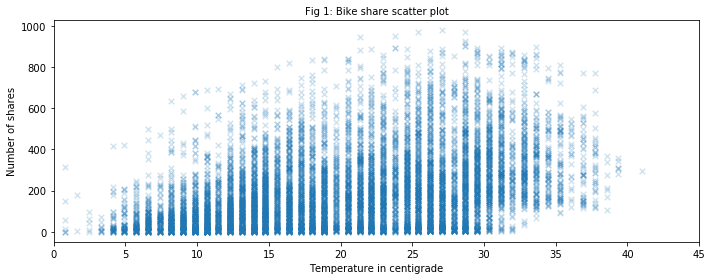

,shares,temperature
0,16,9.84
1,40,9.02
2,32,9.02
3,13,9.84
4,1,9.84


In [20]:
'read the bike sharing demand data'
url = '../data/train.csv'
byk = pd.read_csv(url)

'prepare the data to to have only "temp" and "count" columns '
ts = byk[['count','temp']]

# rename coulmn header
ts.columns = ['shares', 'temperature']



fig = plt.figure(figsize=(10,4))
ax1 = plt.subplot2grid((1,6), (0,0), colspan=6)
ax1.scatter( ts.temperature, ts.shares,s=30, cmap='gray', marker='x', alpha=0.2, linewidths=1)
ax1.set_xlim(0,45)
ax1.set_xlabel('Temperature in centigrade')
ax1.set_ylabel('Number of shares');
ax1.set_title('Fig 1: Bike share scatter plot',fontsize=10)

fig.tight_layout()
plt.show() 

'verify the data'
ts.head().tail()


Assuming there are no **shares** when the **temperature = 0** and comparing the above data to the equation (2), we can say that the **temperature** is a feature variable and number of **shares** is a target variable, the equation can be written as below:

$ shares = \theta_1 * temparature $ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (3)

> * We can predict the **number of shares** if we know the parameter $\theta_1$ for any temperatute using equation (3)!!!<br/>
> * $ \theta_1 $ is also called as the slope of the line equation (3)

To know the correlation between **shares** and **temperature**, let's plot the scatter plots.

Figure 1 is the **scatter plot** of the bike share hourly dataset. Observe that as the temperature increases there is a rise in number of bike shares. 

> With this data can we **predict** the total count of bikes shares for a given temperature?

Let's attempt this prediction using equation (3) we have derived for the bike shares dataset above.<br/><br/>
Let's calculate the value of $ \theta_1  = \dfrac{shares}{temperature}$ for shares = 40 at temperature = 9.02 deg cent.<br/>

$\theta_1  = \dfrac{40}{9.02} = 4.43$

Let's draw the fitting straight line  using the $\theta_1 = 4.43$ over the scatter plot as below passing through the origin since we assumed $\theta_0 = 0$


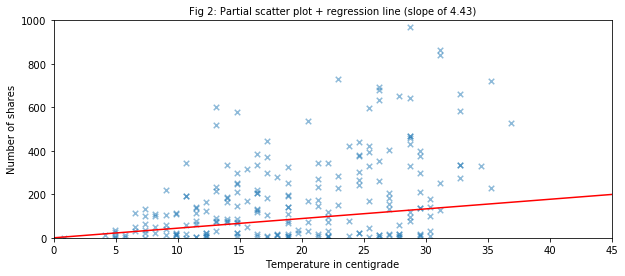

In [21]:
sts = ts.sample(frac=0.02)
fig = plt.figure(figsize=(10,4))
ax2 = plt.subplot2grid((1,6), (0,0), colspan=6)
ax2.scatter( sts.temperature, sts.shares,s=30, cmap='gray', marker='x', alpha=0.5, linewidths=1)
ax2.set_xlim(0,45)
ax2.set_ylim(0,1000)
ax2.set_title('Fig 2: Partial scatter plot + regression line (slope of 4.43)',fontsize=10)
ax2.set_xlabel('Temperature in centigrade')
ax2.set_ylabel('Number of shares');
x1 = np.linspace(0, 400, 1000)
y1 = 4.43*x1
ax2.plot(x1,y1, color='r')

If we treat the straight line over the scatter plot in fig 2 is the best fit line and if we try to predict the **shares** for a given new temperature say $37^\circ$C results in around 200 shares which is way below the actual value as per the training data set. We can say that the straight line over the scatter plot in fig 2 is N OT the best fit line.

To know whether a given straight line is the best fit curve, we should verify the difference between the predicted value and actual values in the training data. This difference is the **error** in the prediction due to deduced fitting curve computation. Figure 3 is the error plot for $\theta_1 = 4.43$.

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

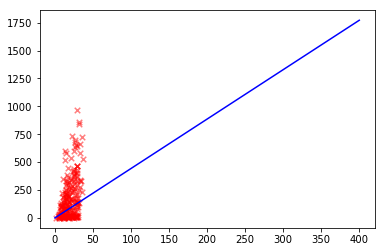

In [22]:
fig = plt.figure(figsize=(6,4))
ax1 = plt.subplot2grid((1,4), (0,0), colspan=4)
ax1.scatter(sts.temperature, sts.shares, s=30, c='r', marker='x', alpha=0.5, linewidths=1)
ax2.set_xlim(0,45)
ax2.set_ylim(0,1000)
ax2.set_title('Fig 2: Partial scatter plot + regression line (slope of 4.43)',fontsize=10)
ax2.set_xlabel('Temperature in centigrade')
ax2.set_ylabel('Number of shares');
x1 = np.linspace(0, 400, 1000)
y1 = 4.43*x1
ax1.plot(x1,y1, color='b')

sdx = sts.temperature

#print(sdx)

for i, val in  enumerate(sdx):
    sx = val
    sy = sts.shares
    
    lx = sx
    ly = lx
    lnp = np.linspace(ly,sy, 5)
    #print(lnp)
    ax1.plot([lx, lx, lx, lx,lx],lnp, color='b')
    

fig.tight_layout()
plt.show() 

## 1: Overview
**Linear regression** is a **statistical method** provides relationships between **continuous (quantitative) variables** by fitting a **linear equation** to the observed data. 

**Simple linear regression** fits a model for **one dependent (response) variable** to **one independent (explanatory) variable**. Following are some examples:

+ How does a household’s gas consumption vary with outside temperature?
+ How does the risk of heart disease vary with blood pressure?

**Multiple Regression** fits a model for **one dependent (response) variable** based on **more than one independent (explanatory) variables**. Following is the example:

+ How does the crime rate in an area vary with differences in police expenditure, unemployment, or income inequality?


### Resources
1. https://www.kaggle.com/rajanand/rainfall-in-india
2. https://www.socialresearchmethods.net/kb/variable.php
3. http://www.statisticssolutions.com/independent-and-dependent-variables/
4. https://www.coursera.org/learn/machine-learning


## 2: A simple linear function


To understand **Machine Learning** concepts , consider a simple linear function of **x** as below:

$ y = f(x) $ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (1) ... **simple linear function**

$ x $ = Input variable / Feature<br/>
$ y $ = Output variable / Target variable



Supervised Machine Learning algorithms outputs a **hypothesis**, which maps **x** to **y**. <br/>
In this linear relationship, we shall assume  the **hypothesis** is a **straight line function of x** as below:

$ h_\theta(x) = \theta_0 + \theta_1 x$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (2) ... **hypothesis**

where<br/>
$ \theta_0 $ and $\theta_1$ are the parameters of the model <br/>
$ h_\theta(x) $ is the predicted output for a given feature $x$

In the **linear regression machine learning**, the **hypothesis** $ h_\theta(x)$ is trained aganist a given set of $x$ to identified the values of the parameters $ \theta_0 $ and $\theta_1$. Once the parameters $ \theta_0 $ and $\theta_1$ are known for a given training set of feature $x$, the **hypothesis** $ h_\theta(x)$ should be able to predict any new values of the feature $x$.

The above model represents the linear regression with **one** variable which is also called **univariate linear regression**

## 3: Cost function

From equations (1) and (2), we know that $y$ is the actual value and $ h_\theta(x)$ is the predicted value and we need to choose $\theta_0 and \theta_1$ such a way that  $ h_\theta(x)$ should be close to $y$ for the training set values $x$

Choose $min(\theta_i)$ such that  $(h_\theta(x) - y) \simeq 0 $ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (3) ... **Error function**

The $(h_\theta(x) - y)$ is also called as the error value.

Considering the squared errors to discard -ve values, the linear regression error function can be written as below for the training set $x$ of size $m$. Squared error function is also called as **Cost Function**

$  \underset {\theta_0, \theta_1} {minium} = J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^m \left(h_\theta(x^{(i)}) - y^{(i)}\right)^2 $ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (4) ... **Cost Function**

The **GOAL** of the linear regression is to choose the value of the **parameters** $\theta_0$ and $\theta_1$ that minimises the finction $J(\theta_0, \theta_1)$. Hence by finding the $J(\theta_0, \theta_1)$ **miminum** results in **best straight line regression line** for the given training set.

$  \underset {\theta_0, \theta_1} {minium}$ $J(\theta_0, \theta_1)$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (5) ... **Minimised Cost Function**


## 4: Recap

**Simple linear function**: $ y = f(x) $ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (1)

**Hypothesis**: $ h_\theta(x) = \theta_0 + \theta_1 x$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (2)

**Error function**: Choose $min(\theta_i)$ such that  $(h_\theta(x) - y) \simeq 0 $ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (3)

**Cost Function**: $  \underset {\theta_0, \theta_1} {minium} = J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^m \left(h_\theta(x^{(i)}) - y^{(i)}\right)^2 $ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (4)

**Minimised Cost Function**: $  \underset {\theta_0, \theta_1} {minium}$ $J(\theta_0, \theta_1)$ &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (5)

The **GOAL** of the linear regression is to choose the value of the **parameters** $\theta_0$ and $\theta_1$ that minimises the finction $J(\theta_0, \theta_1)$. Hence by finding the $J(\theta_0, \theta_1)$ **miminum** results in **best straight line regression line** for the given training set.


## 4: Realization using Python

In [2]:

%matplotlib inline
#%matplotlib notebook

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))


#### Overview
Linear Reg


In [8]:
data = np.loadtxt('../data/ex1data1.txt', delimiter=',')

In [4]:
x = np.c_[np.ones(data.shape[0]),data[:,0]]
y = np.c_[data[:,1]]


NameError: name 'x' is not defined

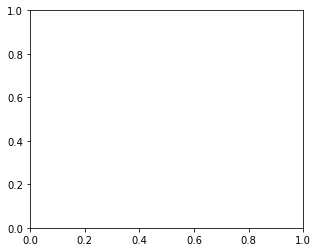

In [75]:
fig = plt.figure(figsize=(10,4))
ax1 = plt.subplot2grid((1,8), (0,0), colspan=4)
ax1.scatter(x[:,1], y, s=30, c='r', marker='x', alpha=0.5, linewidths=1)
ax1.set_xlim(4,24)
ax1.set_xlabel('Population of City in 10,000s')
ax1.set_ylabel('Profit in $10,000s');
ax2 = plt.subplot2grid((1,8), (0,4), colspan=4)
ax2.scatter(x[:,1], y, s=30, c='r', marker='x', alpha=0.5, linewidths=1)
ax2.set_xlim(0,24)
ax2.set_ylim(0,25)
ax2.set_xlabel('Population of City in 10,000s')
ax2.set_ylabel('Profit in $10,000s');

x1 = np.linspace(0, 30, 20)
y1 = x1
ax2.plot(x1,y1, color='b')

fig.tight_layout()
plt.show() 

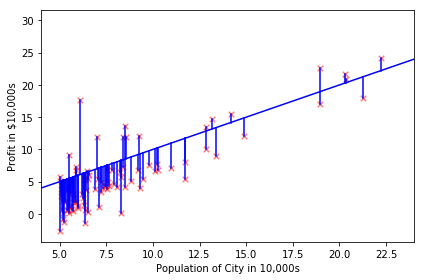

In [12]:
fig = plt.figure(figsize=(6,4))
ax1 = plt.subplot2grid((1,4), (0,0), colspan=4)
ax1.scatter(x[:,1], y, s=30, c='r', marker='x', alpha=0.5, linewidths=1)
ax1.set_xlim(4,24)
ax1.set_xlabel('Population of City in 10,000s')
ax1.set_ylabel('Profit in $10,000s');
x1 = np.linspace(0, 30, 20)
y1 = x1
ax1.plot(x1,y1, color='b')

sdx = x[:,1]

#print(sdx)

for i, val in  enumerate(sdx):
    sx = val
    sy = y[i]
    
    lx = sx
    ly = lx
    lnp = np.linspace(ly,sy, 5)
    #print(lnp)
    ax1.plot([lx, lx, lx, lx,lx],lnp, color='b')
    

fig.tight_layout()
plt.show() 

## 2.2 Gradient Descent
Fit the linear regression parameters $\,\theta \,$ to the dataset using gradient descent equation:

$ J(\theta) = \frac{1}{2m} \displaystyle\sum_{i=1}^{m} (h_\theta (x) - y)^2 \,\,\, where \,\,\, h_\theta (x) = \theta_0 + \theta_1 x $

Assuming, $\,\, \theta_0=0 \,\, $ which is nothing but the fit line passes through the origin:

$h_\theta (x) = \theta_1 x $

Substituting the $\,\,h_\theta (x)\,\,$, in the equation 1:

$ J(\theta) = \frac{1}{2m} \displaystyle\sum_{i=1}^{m} (\theta_1 x  - y)^2$


In [13]:
def computeCost(x, y, theta=[[0],[0]]):
    m = y.size
    J = 0
    
    h = x.dot(theta)
    
    J = 1/(2*m)*np.sum(np.square(h-y))
    #print(m)
    return(J)

In [14]:
computeCost(x,y)

32.072733877455676

In [15]:
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))


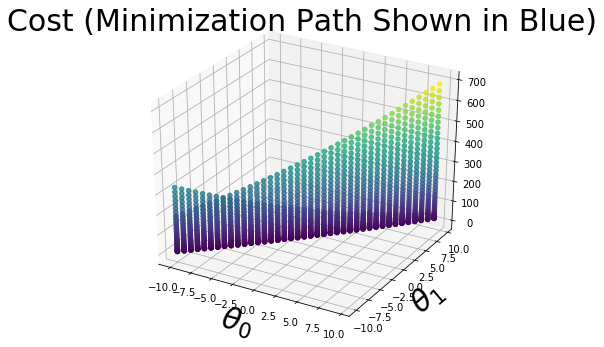

In [16]:
#Import necessary matplotlib tools for 3d plots
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

fig = plt.figure(figsize=(7,6))
ax = fig.gca(projection='3d')

xvals = np.arange(-10,10,.5)
yvals = np.arange(-1,4,.1)
myxs, myys, myzs = [], [], []
for david in xvals:
    for kaleko in yvals:
        myxs.append(david)
        myys.append(kaleko)
        myzs.append(computeCost(x,y,np.array([[david], [kaleko]])))

scat = ax.scatter(myxs,myxs,myzs,c=np.abs(myzs), alpha=0.8)

plt.xlabel(r'$\theta_0$',fontsize=30)
plt.ylabel(r'$\theta_1$',fontsize=30)
plt.title('Cost (Minimization Path Shown in Blue)',fontsize=30)
#plt.plot([x[0] for x in thetahistory],[x[1] for x in thetahistory],jvec,'bo-')
plt.show()